In [6]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

# --- 配置 Matplotlib 以正确显示中文和负号 ---
# 解决中文显示问题 (例如：使用黑体，SimHei是常见的黑体字体名称)
plt.rcParams['font.sans-serif'] = ['SimHei'] 
# 解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False 

print("所需库已导入，中文显示配置完成。")


所需库已导入，中文显示配置完成。


In [7]:
# 【重要】确保已在终端运行 pip install openpyxl

# 定义原始Excel文件名
file_excel = '商品销售数据.xlsx' 

print("--- 尝试读取原始 Excel 文件 ---")

try:
    # 使用 pd.read_excel() 直接读取 Excel 文件中的两个工作表
    # sheet_name 参数指定了工作表的名称
    df_info = pd.read_excel(file_excel, sheet_name='信息表') 
    df_sales = pd.read_excel(file_excel, sheet_name='销售数据表')

    print("✅ 成功使用 pd.read_excel() 读取数据。")
    
    # 2.1 数据合并
    # 使用pandas的merge()函数，根据“商品编号”列合并两个数据表，并保留右表。
    df_merged = pd.merge(df_info, df_sales, on='商品编号', how='right')

    print("\n--- 原始数据读取和合并完成 ---")
    print("合并后的数据前5行:")
    print(df_merged.head())
    print("\n数据基本信息:")
    df_merged.info()

except FileNotFoundError:
    print(f"❌ 错误：未找到 Excel 文件：{file_excel}。请确保原始的 .xlsx 文件与 .ipynb 在同一文件夹内。")
except ValueError:
    print("❌ 错误：工作表名称错误。请检查 Excel 文件中的工作表是否命名为 '信息表' 和 '销售数据表'。")
except Exception as e:
    print(f"❌ 错误：使用 Excel 读取失败。请检查 openpyxl 是否安装成功。错误信息: {e}")
    
# 如果读取失败，则 df_merged 变量将不会被定义，我们假设它会成功


--- 尝试读取原始 Excel 文件 ---
✅ 成功使用 pd.read_excel() 读取数据。

--- 原始数据读取和合并完成 ---
合并后的数据前5行:
   商品大类 商品小类     商品名称   商品编号  商品销售价       订单日期          订单编号  订单数量
0  运动配饰   发带   纯色弹力发带  fd003   12.0 2022-01-01  HS2022000001    26
1  运动配饰   发带  糖果色弹力发带  fd004   16.0 2022-01-01  HS2022000002    28
2  运动配饰   手环   篮球运动手环  sh001    8.0 2022-01-01  HS2022000003    20
3  运动配饰   手环  小清新硅胶手环  sh003    6.0 2022-01-01  HS2022000004    35
4  运动上装   背心   跑步运动背心  bx002   39.0 2022-01-01  HS2022000005    60

数据基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   商品大类    2039 non-null   object        
 1   商品小类    2039 non-null   object        
 2   商品名称    2039 non-null   object        
 3   商品编号    2040 non-null   object        
 4   商品销售价   2039 non-null   float64       
 5   订单日期    2040 non-null   datetime64[ns]
 6   订单编号    2040 non-null   object        
 7

In [8]:
# 1. 计算“销售金额”
df_merged['销售金额'] = df_merged['商品销售价'] * df_merged['订单数量']

# 2. 提取“月份”信息
# 将订单日期转换为日期时间类型
df_merged['订单日期'] = pd.to_datetime(df_merged['订单日期'])
# 提取月份数字
df_merged['月份'] = df_merged['订单日期'].dt.month

# 3. 格式化“月份”为“X月”并设置正确顺序，用于图表排序
month_order = [f'{i}月' for i in range(1, 13)]
df_merged['月份'] = df_merged['月份'].astype(str) + '月'
df_merged['月份'] = pd.Categorical(df_merged['月份'], categories=month_order, ordered=True)

print("\n--- 特征工程完成 ---")
print(df_merged[['订单日期', '月份', '商品销售价', '订单数量', '销售金额']].head())


--- 特征工程完成 ---
        订单日期  月份  商品销售价  订单数量    销售金额
0 2022-01-01  1月   12.0    26   312.0
1 2022-01-01  1月   16.0    28   448.0
2 2022-01-01  1月    8.0    20   160.0
3 2022-01-01  1月    6.0    35   210.0
4 2022-01-01  1月   39.0    60  2340.0



--- 每月总销售额统计结果 ---
     月份      销售金额
0    1月  344878.0
1    2月  375111.0
2    3月  431575.0
3    4月  408359.0
4    5月  463358.0
5    6月  424416.0
6    7月  490090.0
7    8月  468356.0
8    9月  433489.0
9   10月  485727.0
10  11月  484643.0
11  12月  470306.0


C:\Users\1\AppData\Local\Temp\ipykernel_9576\2736315454.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df_merged.groupby('月份')['销售金额'].sum().reset_index()


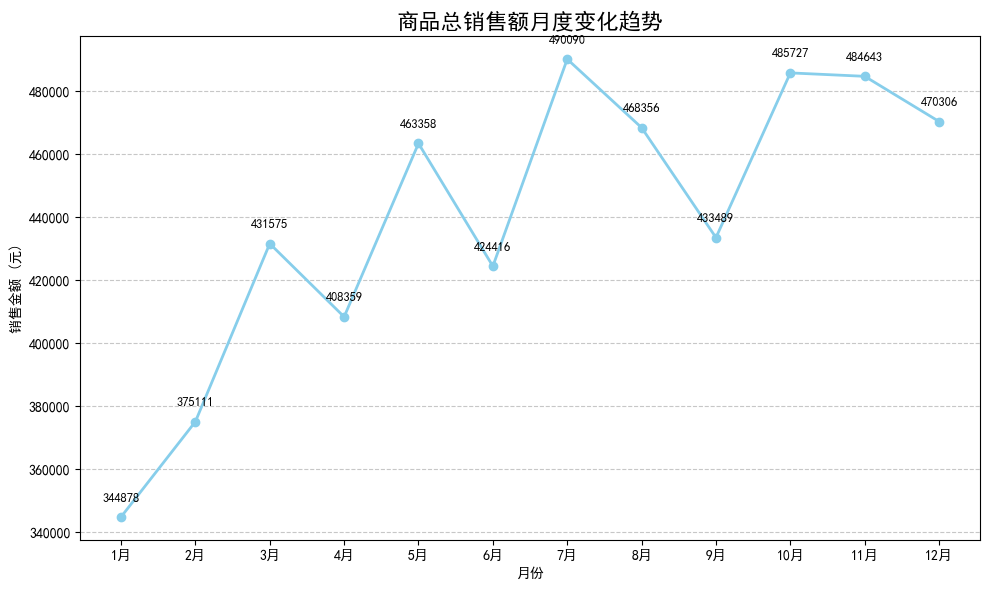

In [9]:
# 1. 按月份统计总销售额
monthly_sales = df_merged.groupby('月份')['销售金额'].sum().reset_index()
monthly_sales = monthly_sales.sort_values('月份') # 确保按1月到12月排序

print("\n--- 每月总销售额统计结果 ---")
print(monthly_sales)

# 2. 可视化：每月总销售额折线图
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['月份'], monthly_sales['销售金额'], 
         marker='o', linestyle='-', color='skyblue', linewidth=2)

plt.title('商品总销售额月度变化趋势', fontsize=16, fontweight='bold')
plt.xlabel('月份')
plt.ylabel('销售金额 (元)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 添加数据标签
for i, row in monthly_sales.iterrows():
    plt.text(row['月份'], row['销售金额'] + monthly_sales['销售金额'].max() * 0.01, 
             f'{row["销售金额"]:.0f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

1. 商品总销售额月度变化趋势解读
总体趋势描述： 全年销售额呈现明显的 [上升型] 趋势。
高峰期（旺季）： 销售额在  [7月] 达到峰值。
可能原因： [年末促销、季节性需求]。
低谷期（淡季）： 销售额在 [1月] 达到最低点。
行动建议： 建议在淡季 [加大折扣、推出跨季节商品、优化库存]。


--- 小类商品每月总销售额统计结果 (部分) ---
    月份 商品小类     销售金额
0   1月   发带  17765.0
1   1月   外套  76656.0
2   1月   手环   8420.0
3   1月   短袖  49187.0
4   1月   短裤  31782.0
5   1月   背心  27571.0
6   1月   袜子  18983.0
7   1月   长袖  39257.0
8   1月   长裤  75257.0
17  2月   长裤  47599.0


C:\Users\1\AppData\Local\Temp\ipykernel_9576\2284594236.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subcategory_monthly_sales = df_merged.groupby(['月份', '商品小类'])['销售金额'].sum().reset_index()


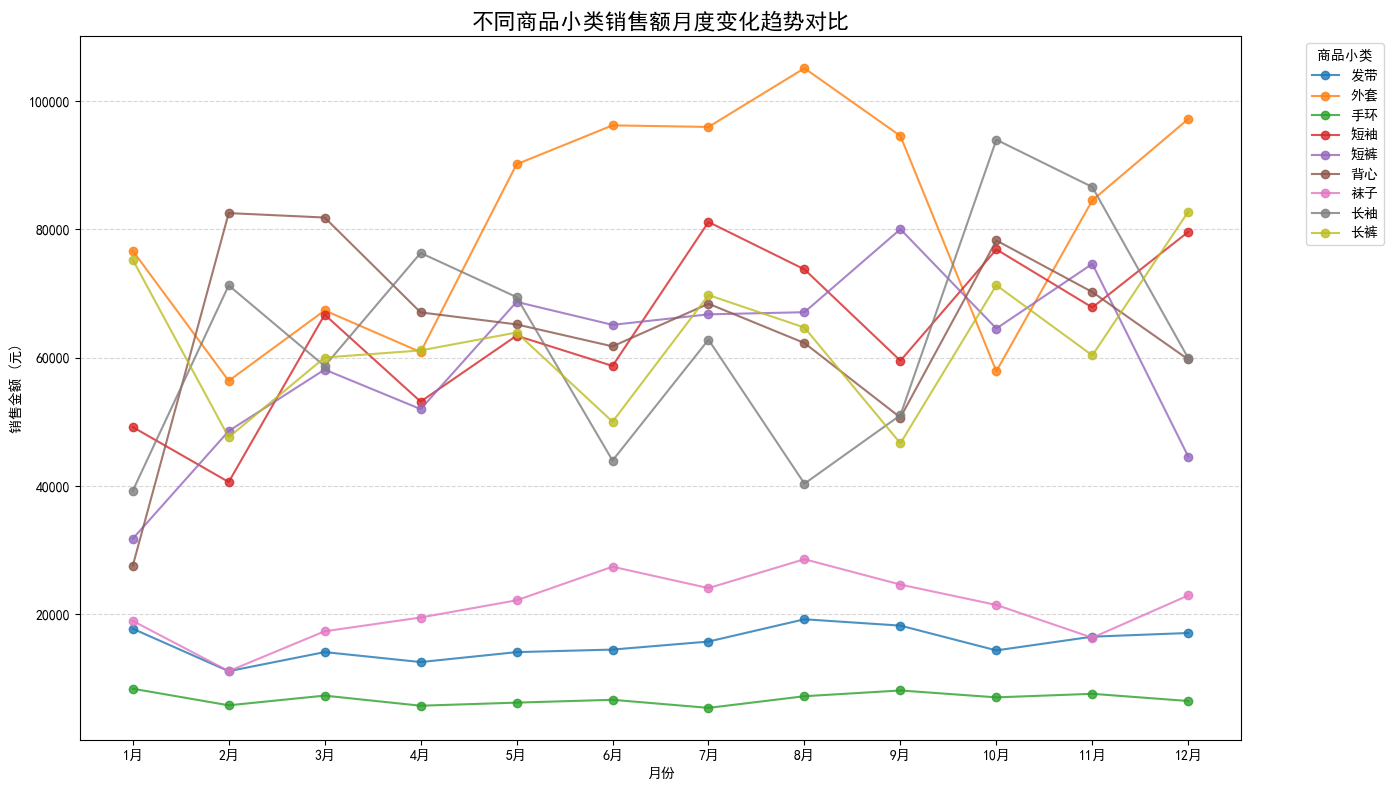

In [10]:
# 1. 按月份和小类统计销售额
subcategory_monthly_sales = df_merged.groupby(['月份', '商品小类'])['销售金额'].sum().reset_index()
subcategory_monthly_sales = subcategory_monthly_sales.sort_values('月份')

print("\n--- 小类商品每月总销售额统计结果 (部分) ---")
print(subcategory_monthly_sales.head(10))

# 2. 可视化：不同商品小类月度变化趋势对比（折线图）
plt.figure(figsize=(14, 8))

subcategories = subcategory_monthly_sales['商品小类'].unique()

# 为每个小类绘制一条折线
for subcategory in subcategories:
    df_plot = subcategory_monthly_sales[subcategory_monthly_sales['商品小类'] == subcategory]
    plt.plot(df_plot['月份'], df_plot['销售金额'], marker='o', label=subcategory, alpha=0.8)

plt.title('不同商品小类销售额月度变化趋势对比', fontsize=16, fontweight='bold')
plt.xlabel('月份')
plt.ylabel('销售金额 (元)')

# 添加图例
plt.legend(title='商品小类', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

2. 小类商品月度变化趋势解读
核心品类（主力军）： 销售额全年最高的商品小类是 [外套] 。
策略建议： 确保充足备货，继续加大对这些核心品类的投入和推广。
季节性品类： 观察到 [短袖] 在夏季（4-8月）销售额上升，而 [外套] 在冬季（10-12月）销售额上升。
策略建议： 针对季节性品类，应提前 1-2 个月进行预热和备货，避免错过销售窗口。


--- 各小类商品总销售额排名 (Top 5) ---
  商品小类      销售金额
1   外套  982788.0
5   背心  775496.0
3   短袖  770515.0
7   长袖  753584.0
8   长裤  753434.0


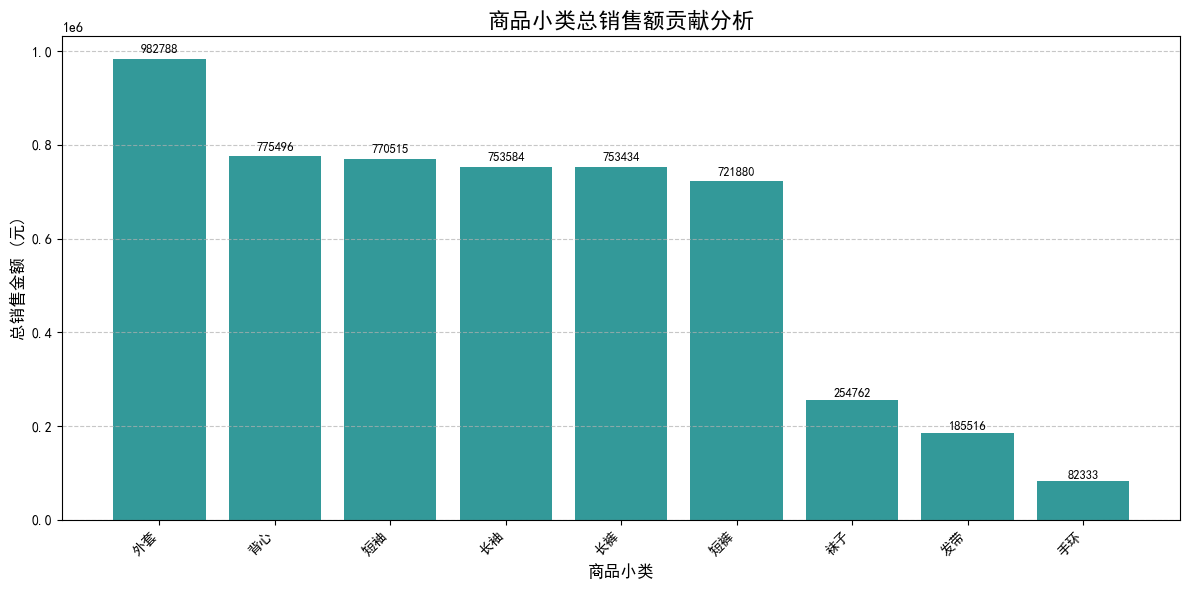

In [11]:
# --- 独立思考加分项：商品小类销售贡献度分析 ---

## 6.1 统计各小类商品总销售额
# 使用 groupby 对 '商品小类' 进行汇总，计算总销售金额
subcategory_total_sales = df_merged.groupby('商品小类')['销售金额'].sum().reset_index()

# 按销售金额降序排列，以便查看排名
subcategory_total_sales = subcategory_total_sales.sort_values('销售金额', ascending=False)

print("\n--- 各小类商品总销售额排名 (Top 5) ---")
print(subcategory_total_sales.head())

## 6.2 可视化：商品小类总销售额柱状图
# 设置图形大小，确保能容纳所有小类名称
plt.figure(figsize=(12, 6))

# 绘制柱状图
bars = plt.bar(subcategory_total_sales['商品小类'], subcategory_total_sales['销售金额'], color='teal', alpha=0.8)

# 添加图表元素
plt.title('商品小类总销售额贡献分析', fontsize=16, fontweight='bold')
plt.xlabel('商品小类', fontsize=12)
plt.ylabel('总销售金额 (元)', fontsize=12)

# 旋转X轴标签，防止名称过长重叠
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 添加数据标签（在每个柱子上方显示具体金额）
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (yval * 0.01), f'{yval:.0f}', ha='center', va='bottom', fontsize=9)


plt.tight_layout()
plt.show()

排名,商品小类,贡献度特点,策略建议
1,[图表中柱子最高的商品小类],绝对主力，店铺招牌,精细化运营： 确保供应链稳定、款式更新频率高、维持优质评价。
2,[图表中柱子第二高的小类],第二增长曲线,利润优化： 关注其毛利率，可通过提高客单价或捆绑销售提升利润空间。
3,[图表中柱子第三高的小类],重要支撑,捆绑销售： 结合排名 1、2 的商品进行套餐推荐，带动销量。
4/5,[图表中柱子第四、五高的小类],潜力商品/长尾,流量引入： 可用于引流款或促销活动，将用户导向高利润商品。